# 第13章 回帰分析 練習問題 答案

統計用のライブラリはできる限り使用せずスクラッチで計算
ただし，検算には用いる

## 13.1

In [1]:
import warnings
import pandas as pd

warnings.simplefilter('ignore')

diameter = [2]*4 + [2.5]*6 + [3]*7 + [3.5]*6 + \
           [4]*7 + [4.5]*6 + [5]*6 + [5.5]*6 + [6]*5 + [6.5]*4 + [7]
height = [2, 2.5, 2.5, 3, 2, 2.5, 3, 3, 3, 3.5, 2.5,
          3, 3, 3.5, 3.5, 4, 4.5, 3, 3.5, 4, 4.5, 5,
          5.5, 3.5, 4, 4.5, 4.5, 5, 5.5, 5.5, 4, 4.5,
          5, 5, 5.5, 5.5, 6, 4.5, 5, 5.5, 6, 6.5, 5,
          5.5, 5.5, 6, 6.5, 7, 5.5, 5.5, 6, 6.5, 7,
          5.5, 6.5, 7, 7, 7.5]
n_sample = len(diameter)

dict_tree = {'Diameter (x)': diameter, 'Height (y)': height}
df_tree = pd.DataFrame(dict_tree)

In [2]:
df_tree

,Diameter (x),Height (y)
0,2.0,2.0
1,2.0,2.5
2,2.0,2.5
3,2.0,3.0
4,2.5,2.0
5,2.5,2.5
6,2.5,3.0
7,2.5,3.0
8,2.5,3.0
9,2.5,3.5


### i) 散布図

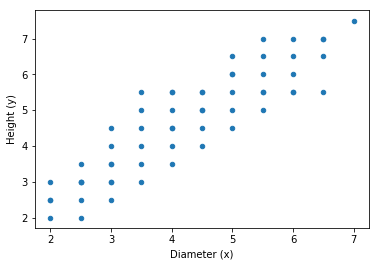

In [3]:
df_tree.plot.scatter(x='Diameter (x)', y='Height (y)')

### ii) 樹高を胸高直径へ回帰する


#### 解析的に解いた場合

In [4]:
# 胸高直径x, 樹高yの標本平均
mean_x = df_tree['Diameter (x)'].mean()
mean_y = df_tree['Height (y)'].mean()
print(f'x: {mean_x}, y: {mean_y}')

x: 4.241379310344827, y: 4.681034482758621


In [5]:
import numpy as np
# 計算準備
df_tree['x_i-mean_x'] = df_tree['Diameter (x)'] - mean_x
df_tree['y_i-mean_y'] = df_tree['Height (y)'] - mean_y
df_tree['(x_i-mean_x)^2'] = df_tree['x_i-mean_x'].apply(lambda x: x**2)
df_tree['(x_i-mean_x)(y_i-mean_y)'] = df_tree['x_i-mean_x'] * df_tree['y_i-mean_y']
df_tree


,Diameter (x),Height (y),x_i-mean_x,y_i-mean_y,(x_i-mean_x)^2,(x_i-mean_x)(y_i-mean_y)
0,2.0,2.0,-2.241379,-2.681034,5.023781,6.009215
1,2.0,2.5,-2.241379,-2.181034,5.023781,4.888526
2,2.0,2.5,-2.241379,-2.181034,5.023781,4.888526
3,2.0,3.0,-2.241379,-1.681034,5.023781,3.767836
4,2.5,2.0,-1.741379,-2.681034,3.032402,4.668698
5,2.5,2.5,-1.741379,-2.181034,3.032402,3.798008
6,2.5,3.0,-1.741379,-1.681034,3.032402,2.927319
7,2.5,3.0,-1.741379,-1.681034,3.032402,2.927319
8,2.5,3.0,-1.741379,-1.681034,3.032402,2.927319
9,2.5,3.5,-1.741379,-1.181034,3.032402,2.056629


In [6]:
# 標本回帰係数
beta2_est = df_tree['(x_i-mean_x)(y_i-mean_y)'].sum() / \
    df_tree['(x_i-mean_x)^2'].sum()
beta1_est = mean_y - beta2_est*mean_x

print(f'β2_estimated: {beta2_est},\nβ1_estimated: {beta1_est}')

β2_estimated: 0.9324473104749922,
β1_estimated: 0.7261717521233093


A. 胸高直径x, 樹高yの標本回帰方程式（標本回帰直線）は次の通り

`y = 0.932x + 0.726`

#### ライブラリ，フレームワークを用いた場合

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

x = df_tree['Diameter (x)'].values.reshape(-1, 1)
y = df_tree['Height (y)'].values

reg.fit(x, y)

print(f'β2_estimated: {reg.coef_[0]},\nβ1_estimated: {reg.intercept_}')

β2_estimated: 0.9324473104749922,
β1_estimated: 0.7261717521233093


解析解とほぼ一致している

### iii) 胸高直径が1寸伸びれば樹高が0.9尺だけ高くなるかを有意水準5%で仮説検定する

偏回帰係数 β2（回帰直線の傾き）
- 帰無仮説 H0: β2 == 0.9
- 対立仮説 H1: β2 != 0.9


In [8]:
beta2 = 0.9

In [9]:
# yの推論値 y_predをiiで求めた回帰方程式より求める
df_tree['y_pred'] = beta2_est*df_tree['Diameter (x)'] + beta1_est
# β2_estの標準誤差 standard error
df_tree['y_diff'] = df_tree['Height (y)'] - df_tree['y_pred']
df_tree['y_diff_squared'] = df_tree['y_diff'].apply(lambda y_diff: y_diff**2)
s_squared = df_tree['y_diff_squared'].sum() / (n_sample-2)
se = np.sqrt(s_squared)
se_for_beta2_est = se / np.sqrt(df_tree['(x_i-mean_x)^2'].sum())
print('β2_estimatedの標準誤差: ', se_for_beta2_est)
# t統計量
t = (beta2_est - beta2) / se_for_beta2_est
print('t統計量: ', t)
# t分布のパーセント点 t_0.025(n-2) 
print(f't_0.025({n_sample-2}): 2.000') # 自由度60で近似
# |t|とt_0.025(n-2)の比較
print(f'A: |{t}| < t_0.025(56)より，有意水準5%で帰無仮説H0は棄却されない') 

β2_estimatedの標準誤差:  0.06322432526628806
t統計量:  0.5132092804206397
t_0.025(56): 2.000
A: |0.5132092804206397| < t_0.025(56)より，有意水準5%で帰無仮説H0は棄却されない


### iv) 標本回帰直線から`2s.e.`以上外れる樹木はあるか

In [10]:
df_tree[df_tree['y_diff'] >= 2*se]

,Diameter (x),Height (y),x_i-mean_x,y_i-mean_y,(x_i-mean_x)^2,(x_i-mean_x)(y_i-mean_y),y_pred,y_diff,y_diff_squared
22,3.5,5.5,-0.741379,0.818966,0.549643,-0.607164,3.989737,1.510263,2.280893


In [11]:
print('A: ある．胸高直径3.5寸，樹高5.5尺の樹木が該当する．')

A: ある．胸高直径3.5寸，樹高5.5尺の樹木が該当する．


### v) 胸高直径8寸の樹高の平均値を推定する

In [12]:
print(f'A: {beta2_est*8+beta1_est}尺')

A: 8.185750235923248尺
